In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [4]:
from keras.utils import to_categorical

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [7]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [11]:
history = model.fit(X_train,y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 0.3304 - accuracy: 0.8992 - val_loss: 0.1037 - val_accuracy: 0.9665
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0971 - accuracy: 0.9702 - val_loss: 0.0694 - val_accuracy: 0.9787
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0696 - accuracy: 0.9787 - val_loss: 0.0635 - val_accuracy: 0.9793
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0550 - accuracy: 0.9834 - val_loss: 0.0499 - val_accuracy: 0.9843
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0453 - accuracy: 0.9856 - val_loss: 0.0502 - val_accuracy: 0.9846
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0402 - accuracy: 0.9871 - val_loss: 0.0517 - val_accuracy: 0.9838
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0330 - accuracy: 0.9899 - val_loss: 0.0515 - val_accuracy: 0.984

In [12]:
metrics = model.evaluate(X_train, y_train, verbose=False)
metrics2 = model.evaluate(X_test, y_test, verbose=False)
print(metrics)
print(metrics2)

[2.920627351077343e-10, 1.0]
[0.12083398550748825, 0.9907000064849854]


In [13]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

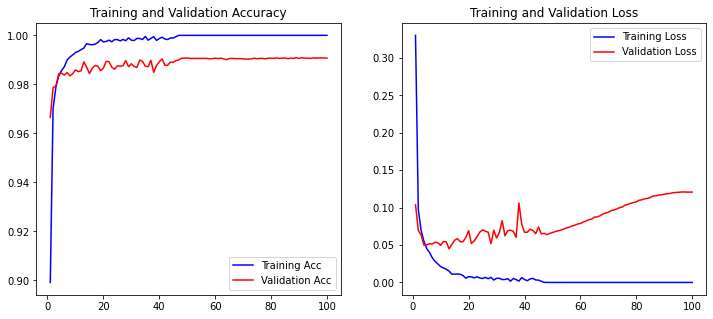

In [14]:
plot_history(history)

In [15]:
model.weights

[<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 3.04779261e-01, -3.55000719e-02, -3.07764173e-01,
            8.63109902e-02, -4.72481549e-01,  2.72155404e-01,
           -4.43033934e-01,  4.59628969e-01, -1.24883115e-01,
            4.61406494e-03,  8.09391141e-02,  3.00433375e-02,
           -3.89024228e-01, -4.91220281e-02,  1.47299185e-01,
            1.05759218e-01,  1.15803061e-02, -3.15024424e-03,
            1.70531169e-01, -5.97342886e-02, -2.28895396e-02,
            2.68916357e-02, -2.51222514e-02, -1.80026636e-01,
            3.01870912e-01,  6.69247657e-02,  5.44311060e-03,
           -2.12909319e-02, -7.30692893e-02, -5.68768501e-01,
            1.06779942e-02, -1.37879416e-01]],
 
         [[ 1.88819230e-01,  9.90890265e-02, -6.27224818e-02,
            3.46773863e-01, -2.76957691e-01,  2.15480197e-02,
           -6.21084869e-01, -2.13145018e-02,  1.49607703e-01,
            2.48717815e-01,  5.19749708e-02, -1.14859201e-01,
         

In [17]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(75, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)              

In [18]:
history = model2.fit(X_train,y_train,
                    epochs=100,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/100
469/469 [==============================] - 5s 11ms/step - loss: 0.2359 - accuracy: 0.9313 - val_loss: 0.0507 - val_accuracy: 0.9827
Epoch 2/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0368 - val_accuracy: 0.9879
Epoch 3/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0381 - accuracy: 0.9880 - val_loss: 0.0287 - val_accuracy: 0.9898
Epoch 4/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0305 - accuracy: 0.9903 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 5/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0266 - val_accuracy: 0.9905
Epoch 6/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0287 - val_accuracy: 0.9915
Epoch 7/100
469/469 [==============================] - 5s 10ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0287 - val_accuracy:

[3.417332528066197e-10, 1.0]
[0.06639379262924194, 0.9943000078201294]


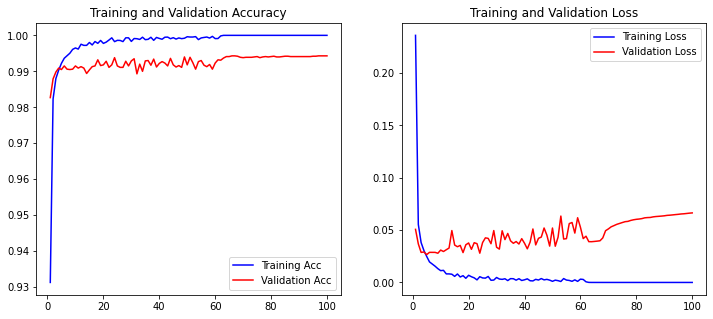

In [19]:
print(model2.evaluate(X_train, y_train, verbose=False))
print(model2.evaluate(X_test, y_test, verbose=False))
plot_history(history)

In [20]:
model3 = Sequential()
model3.add(Conv2D(32, (5, 5), activation='tanh', input_shape=(28,28,1), padding="same"))
model3.add(MaxPooling2D((3, 3)))
model3.add(Conv2D(64, (7, 7), activation='tanh', padding="same"))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 3, 3, 64)          100416    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

In [21]:
history = model3.fit(X_train,y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 8ms/step - loss: 1.6942 - accuracy: 0.5794 - val_loss: 0.8608 - val_accuracy: 0.8191
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.5824 - accuracy: 0.8646 - val_loss: 0.4017 - val_accuracy: 0.9048
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3408 - accuracy: 0.9129 - val_loss: 0.2710 - val_accuracy: 0.9293
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2529 - accuracy: 0.9320 - val_loss: 0.2154 - val_accuracy: 0.9410
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2062 - accuracy: 0.9438 - val_loss: 0.1799 - val_accuracy: 0.9509
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1762 - accuracy: 0.9511 - val_loss: 0.1546 - val_accuracy: 0.9574
Epoch 7/10
469/469 [==============================] - 4s 7ms/step - loss: 0.1550 - accuracy: 0.9571 - val_loss: 0.1377 - val_accuracy: 0.9611
Epoch 

[0.11014524102210999, 0.9691333174705505]
[0.10452087223529816, 0.9718999862670898]


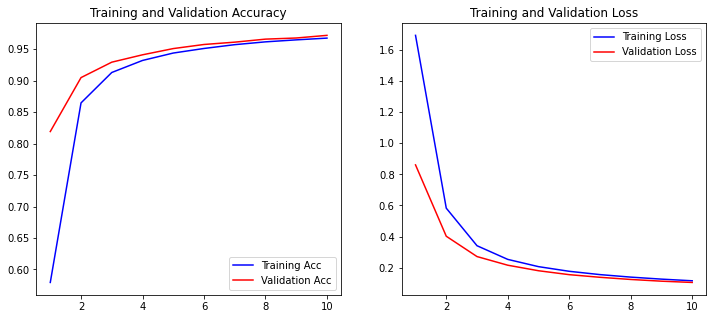

In [22]:
print(model3.evaluate(X_train, y_train, verbose=False))
print(model3.evaluate(X_test, y_test, verbose=False))
plot_history(history)

In [23]:
import time

In [24]:
filters = [8,16,32,64,128,256,512]
f_train,f_test = [],[]
for i in filters:
    model = Sequential()
    model.add(Conv2D(i, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    f_train.append(model.evaluate(X_train,y_train,verbose=False)[-1])
    f_test.append(model.evaluate(X_test,y_test,verbose=False)[-1])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2651 - accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1044 - accuracy: 0.9697
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0553 - accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0390 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0341 - accuracy: 0.9889
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [25]:
from keras.layers import Input

In [26]:
layer = [1,2,3,4,5]
l_train, l_test = [],[]
for i in range(len(layer)):
    model=Sequential()
    model.add(Input(shape=X_train.shape[1:]))
    for j in range(layer[i]):
        model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    l_train.append(model.evaluate(X_train,y_train,verbose = False)[-1])
    l_test.append(model.evaluate(X_test,y_test,verbose = False)[-1])

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1805 - accuracy: 0.9471
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0685 - accuracy: 0.9795
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0477 - accuracy: 0.9858
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0256 - accuracy: 0.9917
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0194 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0150 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0088 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.007

In [27]:
fs = [3,5,7]
fs_train, fs_test = [],[]
for i in fs:
    model = Sequential()
    model.add(Conv2D(32, (i, i), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (i, i), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    fs_train.append(model.evaluate(X_train,y_train,verbose=False)[-1])
    fs_test.append(model.evaluate(X_test,y_test,verbose=False)[-1])

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1290 - accuracy: 0.9617
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0302 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0145 - accuracy: 0.9953
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0099 - accuracy: 0.9967
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0086 - accuracy: 0.9972
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - lo

In [28]:
act = ["sigmoid","relu","tanh"]
a_train, a_test = [],[]
for i in act:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=i, input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation=i))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    a_train.append(model.evaluate(X_train,y_train,verbose=False)[-1])
    a_test.append(model.evaluate(X_test,y_test,verbose=False)[-1])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6944 - accuracy: 0.7814
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1861 - accuracy: 0.9457
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1086 - accuracy: 0.9678
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0822 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0682 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0576 - accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0491 - accuracy: 0.9848
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0426 - accuracy: 0.9872
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0371 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [29]:
pool = [2,3,4]
p_train, p_test = [],[]
for i in pool:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(MaxPooling2D((i, i)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((i, i))) 
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    p_train.append(model.evaluate(X_train,y_train,verbose=False)[-1])
    p_test.append(model.evaluate(X_test,y_test,verbose=False)[-1])


Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1786 - accuracy: 0.9472
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0585 - accuracy: 0.9821
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0430 - accuracy: 0.9867
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0352 - accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0248 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0205 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0178 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0153 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.012

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

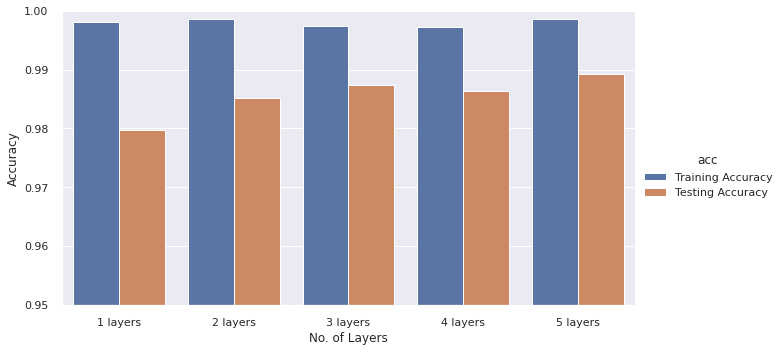

In [31]:
plt.style.use('seaborn')
filters = [str(i) for i in filters]
layer = [str(i) for i in layer]
fs = [str(i) for i in fs]
pad = [str(i) for i in pad]
sns.set(font_scale=1.0)
data={'No. of Layers':[str(i)+" layers" for i in layer]
      ,'Training Accuracy':l_train
      ,'Testing Accuracy':l_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="No. of Layers", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='No. of Layers', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/11)
nls.set(ylim=(0.95,1))

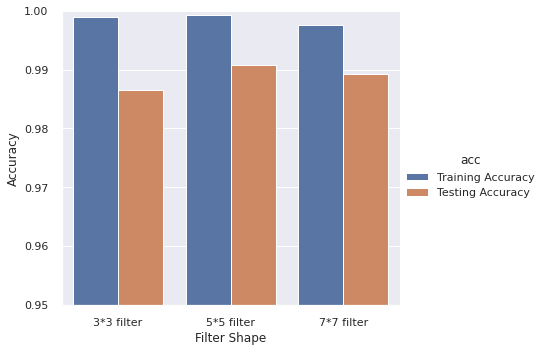

In [33]:
data={'Filter Shape':[str(i)+"*"+str(i)+" filter" for i in fs]
      ,'Training Accuracy':fs_train
      ,'Testing Accuracy':fs_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Filter Shape", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Filter Shape', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/17)
nls.set(ylim=(0.95,1))

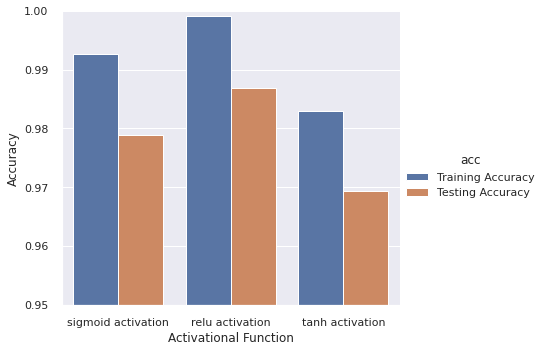

In [34]:
data={'Activational Function':[str(i)+" activation" for i in act]
      ,'Training Accuracy':a_train
      ,'Testing Accuracy':a_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Activational Function", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Activational Function', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/17)
nls.set(ylim=(0.95,1))

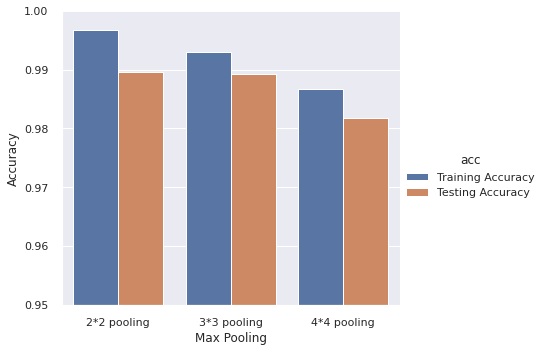

In [35]:
data={'Max Pooling':[str(i)+"*"+str(i)+" pooling" for i in pool]
      ,'Training Accuracy':p_train
      ,'Testing Accuracy':p_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Max Pooling", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Max Pooling', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/17)
nls.set(ylim=(0.95,1))

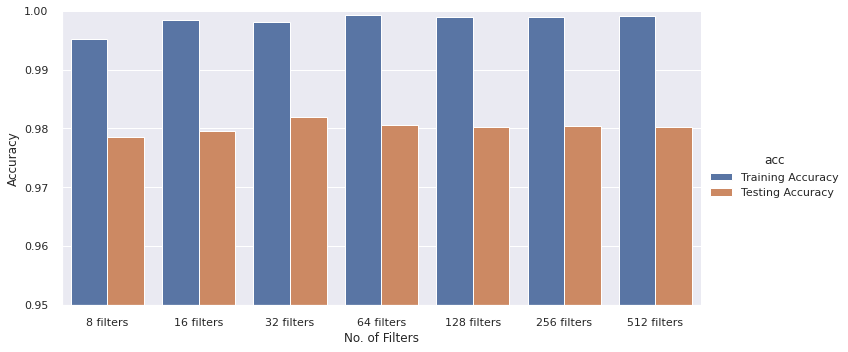

In [36]:
data={'No. of Filters':[str(i)+" filters" for i in filters]
      ,'Training Accuracy':f_train
      ,'Testing Accuracy':f_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="No. of Filters", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='No. of Filters', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/10)
nls.set(ylim=(0.95,1))

In [37]:
stride = [2,3]
s_train,s_test = [],[]
for i in stride:
    model=Sequential()
    model.add(Conv2D(32, kernel_size = (3,3), activation="relu",input_shape=(28,28,1),strides=(i, i)))
    model.add(Conv2D(32, kernel_size = (3,3), activation="relu",strides=(i, i)))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    t=time.time()
    model.fit(X_train,y_train,epochs=10)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    s_train.append(model.evaluate(X_train,y_train,verbose=False)[-1])
    s_test.append(model.evaluate(X_test,y_test,verbose=False)[-1])

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2259 - accuracy: 0.9348
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0838 - accuracy: 0.9744
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0640 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0505 - accuracy: 0.9847
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0420 - accuracy: 0.9869
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0354 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0298 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0210 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.019

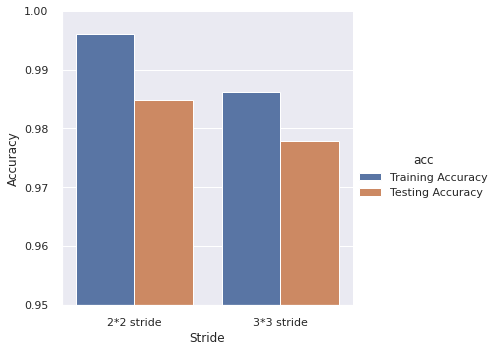

In [38]:
stride = [str(i) for i in stride]
data={'Stride':[str(i)+"*"+str(i)+" stride" for i in stride]
      ,'Training Accuracy':s_train
      ,'Testing Accuracy':s_test}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Stride", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Stride', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/19)
nls.set(ylim=(0.95,1))

In [39]:
epoch = [5,10,50,100]
e_train = []
e_test = []
for e in epoch:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(10, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    t=time.time()
    model.fit(X_train,y_train, epochs=e)
    print("Time taken:", time.time()-t)
    print("Parameters:", model.count_params())
    e_train.append(model.evaluate(X_train, y_train, verbose=False)[-1])
    e_test.append(model.evaluate(X_test, y_test, verbose=False)[-1])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9617
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9907
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0148 - accuracy: 0.9950
Time taken: 31.18317723274231
Parameters: 193898
Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1355 - accuracy: 0.9592
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9899
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0229 - accuracy: 0.9926
Epoch 5/10
1875/1875 [================

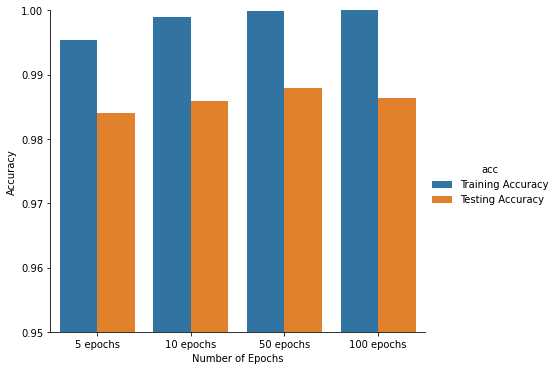

In [40]:
epoch = [str(i) for i in epoch]
data={'Number of Epochs':[str(i)+" epochs" for i in epoch]
      ,'Training Accuracy':e_train
      ,'Testing Accuracy':e_test}
df = pd.DataFrame(data)
df = pd.melt(df, id_vars="Number of Epochs", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Number of Epochs', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/17)
nls.set(ylim=(0.95,1))

In [41]:
# Without Padding
pad_train = []
pad_test = []
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
t=time.time()
model.fit(X_train,y_train, epochs=5)
print("Time taken:", time.time()-t)
print("Parameters:", model.count_params())
pad_train.append(model.evaluate(X_train, y_train, verbose=False)[-1])
pad_test.append(model.evaluate(X_test, y_test, verbose=False)[-1])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1327 - accuracy: 0.9608
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0500 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0332 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9950
Time taken: 25.06291389465332
Parameters: 193898


In [42]:
# With Padding
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
t=time.time()
model.fit(X_train,y_train, epochs=5)
print("Time taken:", time.time()-t)
print("Parameters:", model.count_params())
pad_train.append(model.evaluate(X_train, y_train, verbose=False)[-1])
pad_test.append(model.evaluate(X_test, y_test, verbose=False)[-1])

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1351 - accuracy: 0.9590
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9838
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0345 - accuracy: 0.9887
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0157 - accuracy: 0.9948
Time taken: 25.631681442260742
Parameters: 260458


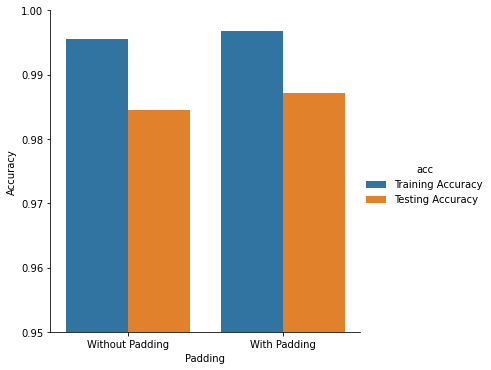

In [43]:
data={'Padding':["Without Padding", "With Padding"]
      ,'Training Accuracy':pad_train
      ,'Testing Accuracy':pad_test}
df = pd.DataFrame(data)
df = pd.melt(df, id_vars="Padding", var_name="acc", value_name="Accuracy")
nls=sns.catplot(x='Padding', y='Accuracy', hue='acc', 
            data=df, kind='bar',height=5.0,aspect=20/20)
nls.set(ylim=(0.95,1))